In [10]:
#Task1 : Restaurant Ratings 

#Analyze the distribution of aggregate ratings and determine the most common rating range.

#Calculate the average number of votes received by restaurants.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("Dataset .csv")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [13]:
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']

df['Rating Range'] = pd.cut(
    df['Aggregate rating'],
    bins=bins,
    labels=labels,
    include_lowest=True
)


In [14]:
rating_distribution = df['Rating Range'].value_counts().sort_index()
rating_percentage = (rating_distribution / len(df)) * 100


In [15]:
rating_table = pd.DataFrame({
    "Rating Range": rating_distribution.index,
    "Number of Restaurants": rating_distribution.values,
    "Percentage (%)": rating_percentage.values.round(2)
})

rating_table


,Rating Range,Number of Restaurants,Percentage (%)
0,0-1,2148,22.49
1,1-2,10,0.10
2,2-3,1891,19.80
3,3-4,4388,45.94
4,4-5,1114,11.66


In [16]:
most_common = rating_distribution.idxmax()
print("Most Common Rating Range:", most_common)


Most Common Rating Range: 3-4


In [17]:
average_votes = df['Votes'].mean()
print("Average Votes Received:", round(average_votes, 2))


Average Votes Received: 156.91


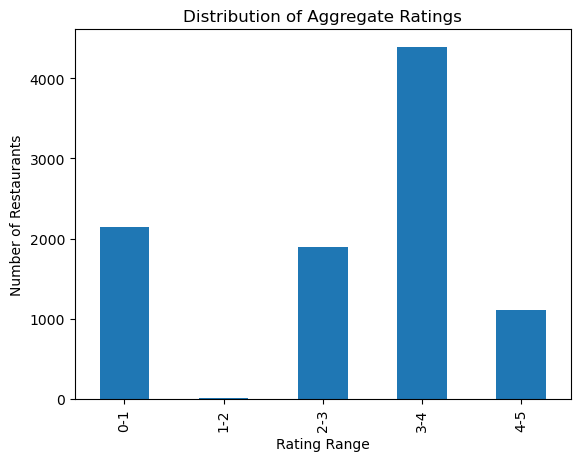

In [18]:
plt.figure()
rating_distribution.plot(kind='bar')
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Rating Range")
plt.ylabel("Number of Restaurants")
plt.show()
